<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

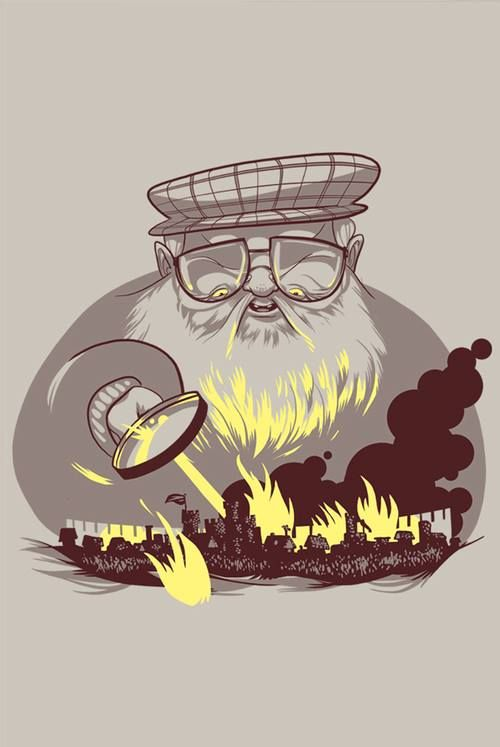

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 44.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 40.9MB/s]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

In [5]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.isna().sum() #axis=1 суммирует наны по строкам

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


<BarContainer object of 25 artists>

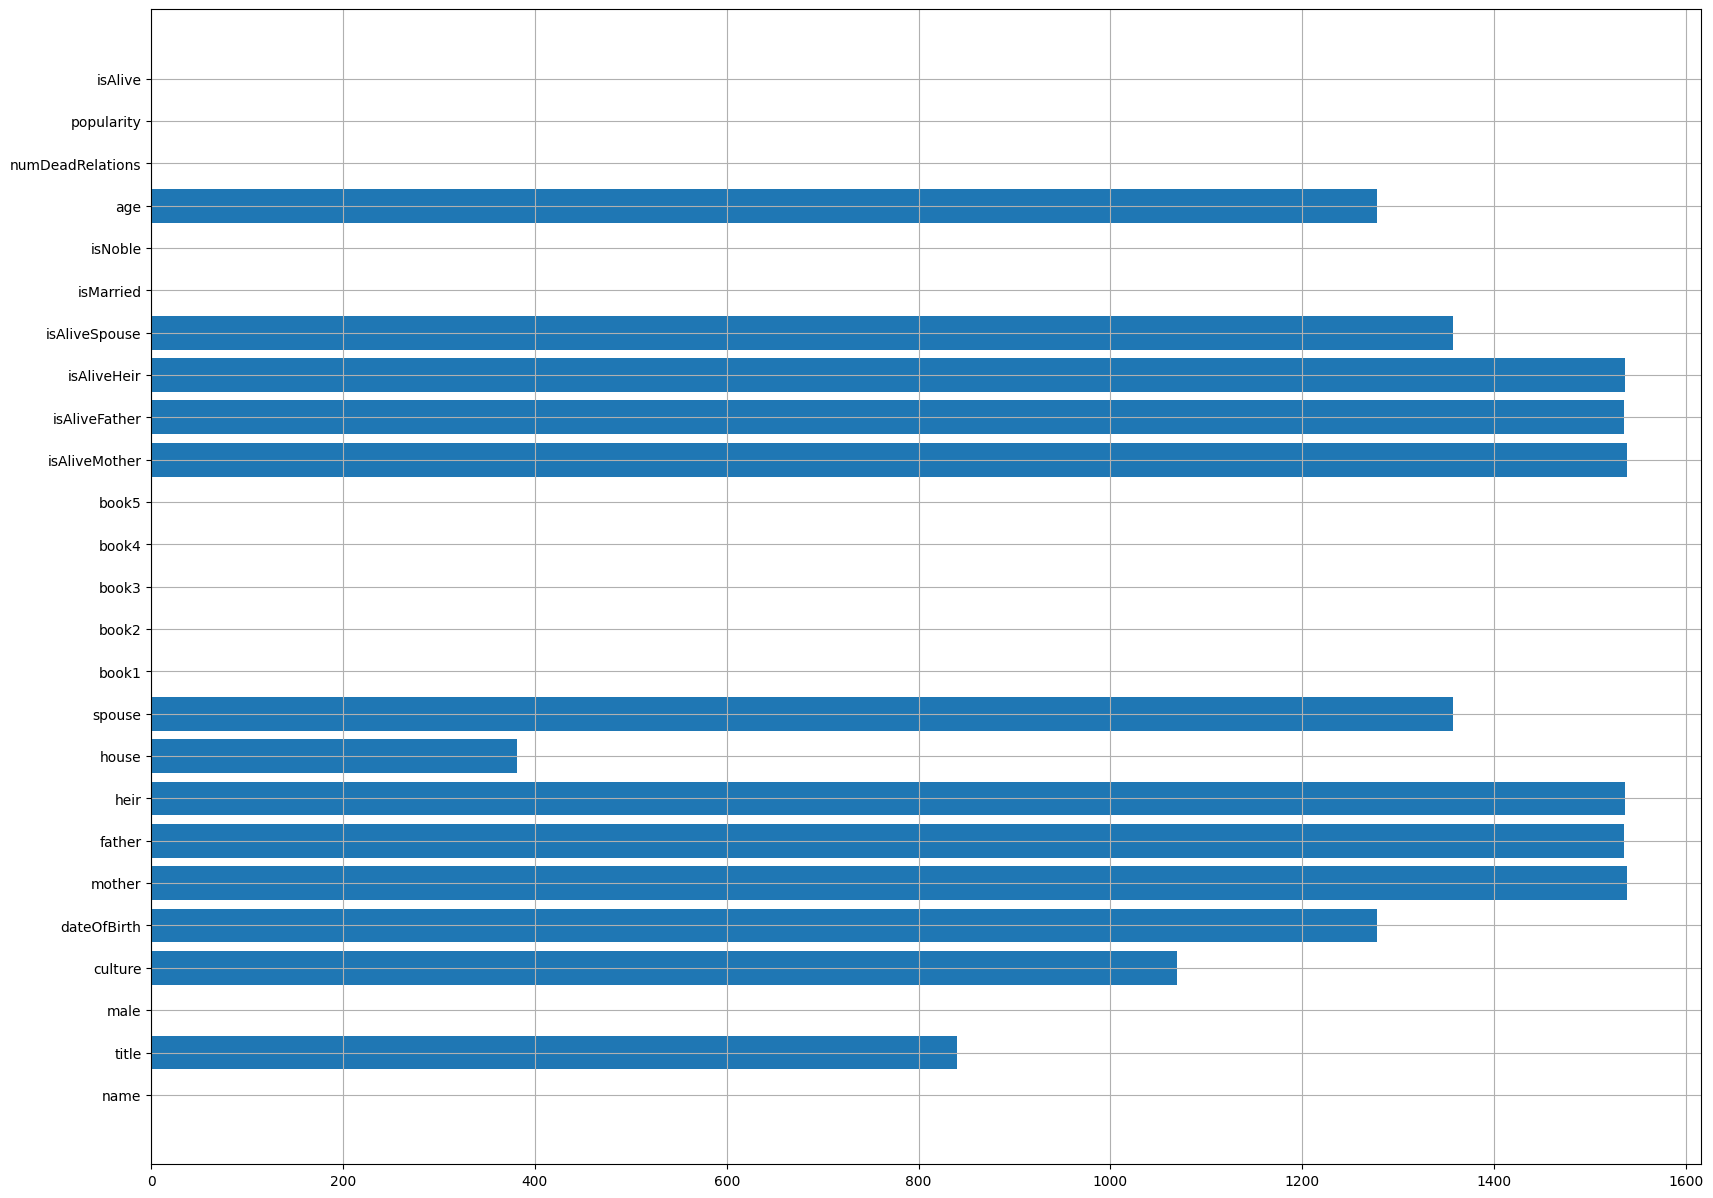

In [ ]:
# визуально смотрим сколько у нас признаков с пропущенными значениями

df = data.isna().sum()

plt.figure(figsize=(20, 15))
plt.grid()
plt.barh(df.index, df.values)


<Axes: xlabel='S.No'>

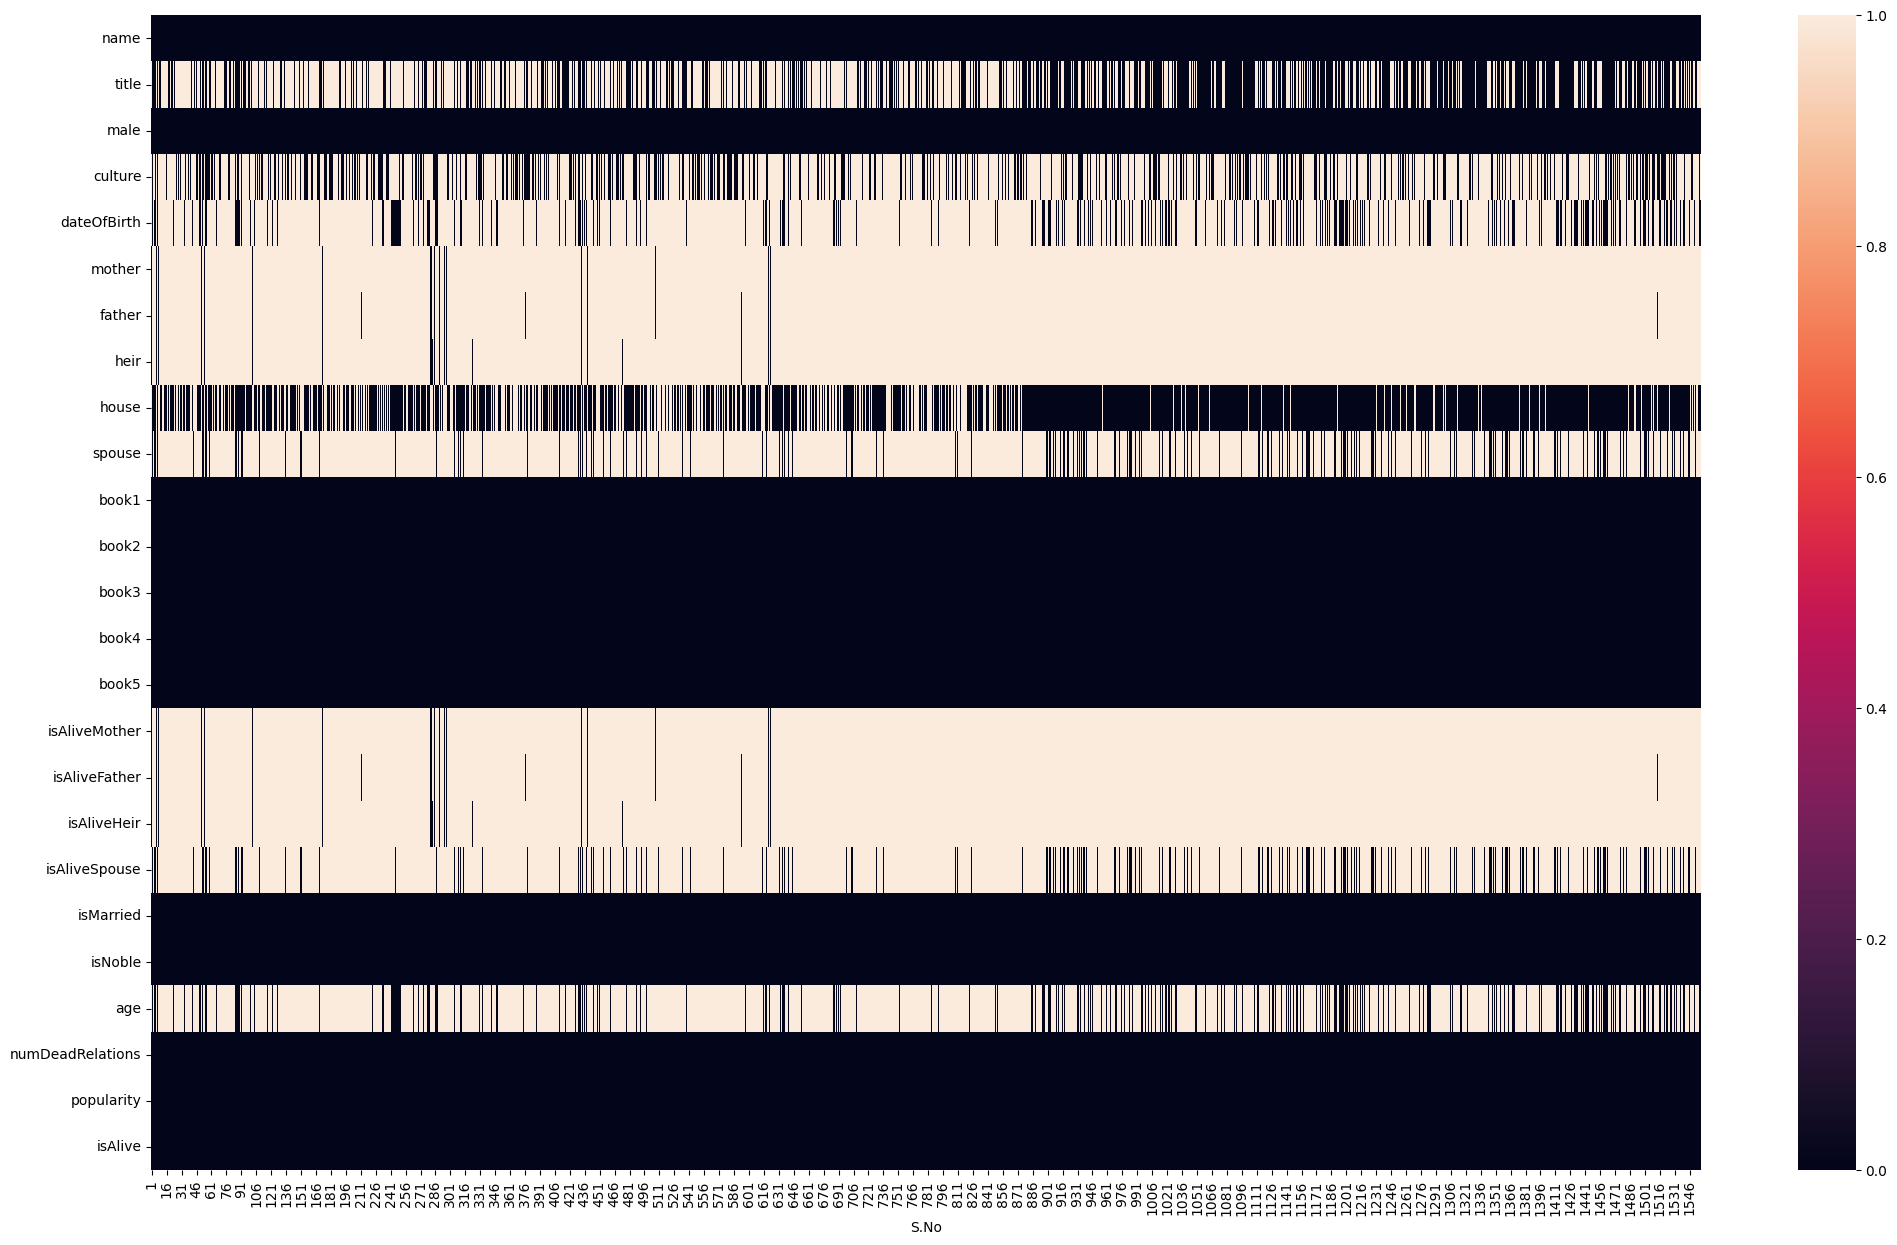

In [ ]:
#чисто на тепловой карте посмотреть ещё
plt.figure(figsize=(25, 15))
sns.heatmap(data.isna().transpose())

In [6]:
# смотрим долю пропущенных значений
na_percentage = round(data['mother'].isna().sum() / len(data['mother']) * 100, 3)
print(f'{na_percentage} - процент пропущенных значение в колонке mother')

98.844 - процент пропущенных значение в колонке mother


In [7]:
# всё-таки что-то слишком много пропущенных значений, примем эти столбцы неинформативными и удалим
# (хотя мб зря, пока не знаю как вытащить полезную инфу в таких случаях)
data.drop(columns=['mother', 'father', 'heir', 'isAliveHeir', 'isAliveMother', 'isAliveFather'], inplace=True)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
house,381
spouse,1357
book1,0
book2,0
book3,0


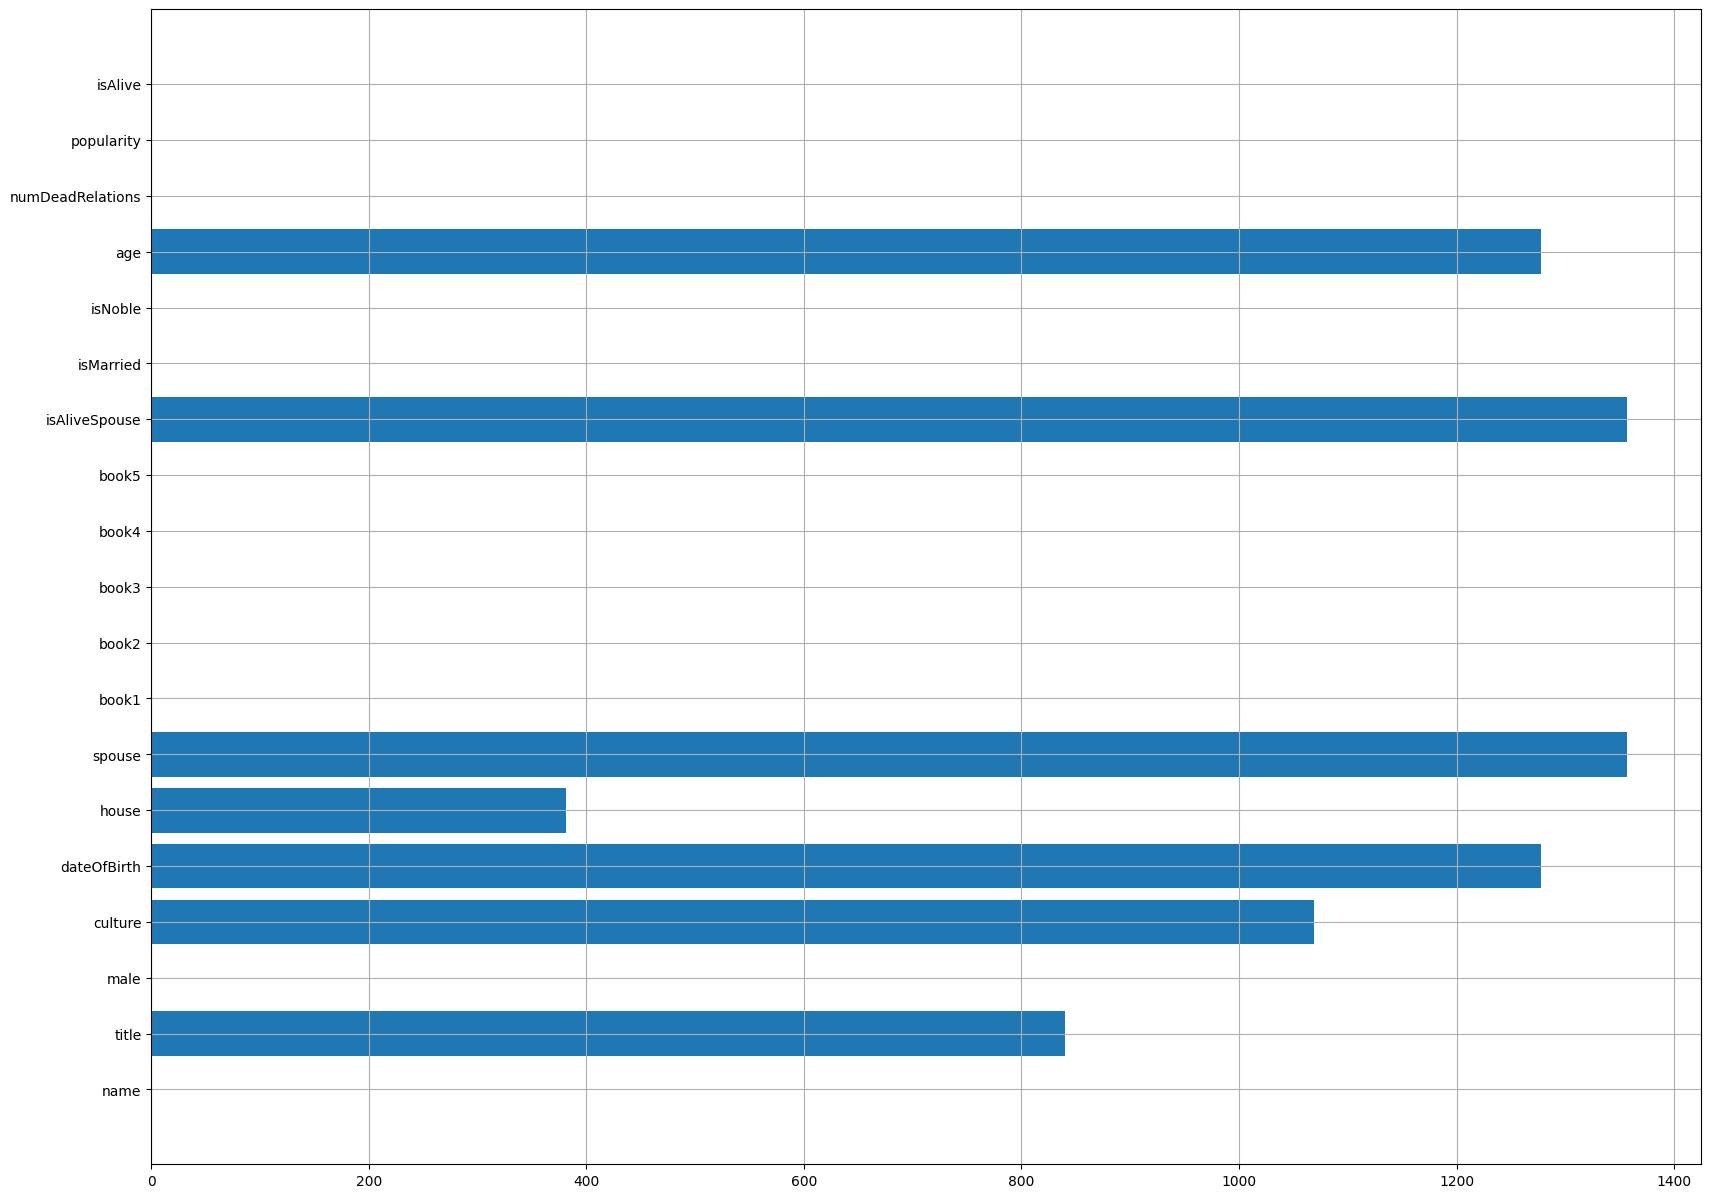

In [ ]:
# визуально глянули на текущую табличу
df1 = data.isna().sum()
plt.figure(figsize=(20, 15))
plt.grid()
plt.barh(df1.index, df1.values)

df1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   house             1176 non-null   object 
 6   spouse            200 non-null    object 
 7   book1             1557 non-null   int64  
 8   book2             1557 non-null   int64  
 9   book3             1557 non-null   int64  
 10  book4             1557 non-null   int64  
 11  book5             1557 non-null   int64  
 12  isAliveSpouse     200 non-null    float64
 13  isMarried         1557 non-null   int64  
 14  isNoble           1557 non-null   int64  
 15  age               279 non-null    float64
 16  numDeadRelations  1557 non-null   int64  
 17  

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dateOfBirth'}>,
        <Axes: title={'center': 'isAliveSpouse'}>,
        <Axes: title={'center': 'numDeadRelations'}>]], dtype=object)

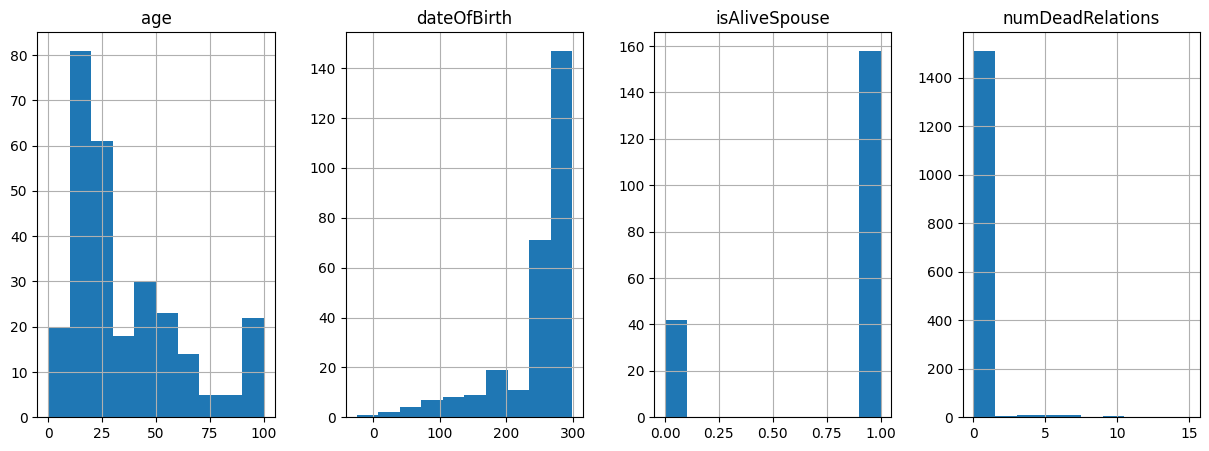

In [ ]:
# взглянем на распределения числовых признаков
columns_realnums = ['age', 'dateOfBirth', 'isAliveSpouse', 'numDeadRelations']
data[columns_realnums].hist(bins=10, figsize=(15, 5), layout=(1, len(columns_realnums)))

In [8]:
# функция для заполнения пропусков в числовых и категориальных признаках, медианой и модой соответственно
# выбрал медиану поскольку есть перекос в распределении числовых признаков, отличающегося от нормального

def fill_na_values(dataset):
    for column in dataset.columns:
        if dataset[column].dtype in [np.float64, np.int64]:  # Числовые колонки
            median_value = dataset[column].median()
            dataset[column].fillna(median_value, inplace=True)
        else:  # Категориальные колонки
            mode_value = dataset[column].mode()[0]  # Извлекаем первое значение моды
            dataset[column].fillna(mode_value, inplace=True)

fill_na_values(data)

<ipython-input-8-249a6fa496dd>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(mode_value, inplace=True)
<ipython-input-8-249a6fa496dd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
house,381
spouse,1357
book1,0
book2,0
book3,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [9]:
# далее всё по заданию 1.4

data['isPopular'] = data['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

In [ ]:
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,House Frey,Walder Frey,0,0,0,0,0,1.0,0,0,24.0,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1.0,1,1,97.0,1,1,1
3,Addison Hill,Ser,1,Northmen,272.0,House Swyft,Walder Frey,0,0,0,1,0,1.0,0,1,24.0,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,1,1,23.0,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,272.0,House Frey,Walder Frey,1,0,1,1,0,1.0,0,1,24.0,1,0,0
1554,Masha Heddle,Ser,0,Northmen,272.0,House Frey,Walder Frey,1,1,0,0,0,1.0,0,0,24.0,0,0,0
1555,Matthos Seaworth,Ser,1,Northmen,272.0,House Seaworth,Walder Frey,0,1,1,1,1,1.0,0,0,24.0,0,0,0


In [ ]:
data['culture'].value_counts()

,count
culture,
Northmen,1163
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17
Reach,13


In [10]:
# Подсказка, объеднить похожие значения категории
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn' : ['ironborn'],
    'Vale': ['vale', 'valemen', 'vale mountain clans']
}

def replace_culture(culture_value):
    culture_value_lower = culture_value.lower()  # Преобразуем значение в нижний регистр
    for common_culture, rare_cultures in cult.items():  # Проходим по словарю
        if culture_value_lower in rare_cultures:  # Если найдено совпадение
            return common_culture  # Возвращаем часто встречающееся значение
    return culture_value  # Если совпадений нет, оставляем исходное значение

# Применяем функцию к столбцу 'culture'
data['culture'] = data['culture'].apply(replace_culture)

In [ ]:
# смотрим, значений стало меньше
data['culture'].value_counts()

,count
culture,
Northmen,1172
Ironborn,92
Free Folk,56
Braavosi,40
Valyrian,28
Vale,23
Dornish,21
Ghiscari,18
Dothraki,17


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [11]:
data.drop(columns=['name'], inplace=True)

In [ ]:
# corr_matrix = data.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Матрица корреляций')
# plt.show()

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

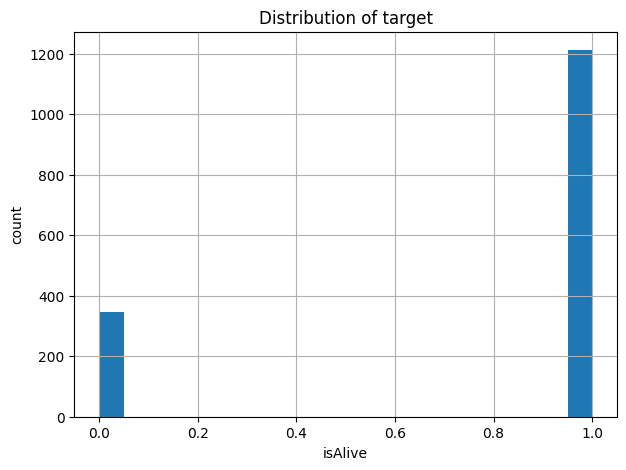

In [12]:
plt.figure(figsize=(7, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.title('Distribution of target')
plt.show()

# есть дисбаланс таргета в ~3.6 раз, кмк, пока хз как с этим бороться, на семинаре дисбаланс был в 2 раза, это было относительно ок

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [14]:
# обрабатываем категориальные признаки, по стандарту ohe

from sklearn.preprocessing import OneHotEncoder

unprocessed_cat_features = data.select_dtypes(include=object)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_cat_features = ohe.fit(unprocessed_cat_features)
ohe_cat_features_trans = ohe.transform(unprocessed_cat_features)
ohe_data = pd.DataFrame(ohe_cat_features_trans, columns=ohe.get_feature_names_out(unprocessed_cat_features.columns), index=unprocessed_cat_features.index)


In [ ]:
ohe_data.shape

(1557, 727)

In [15]:
data_ohe_processed = pd.concat([data, ohe_data], axis=1)
data_ohe_processed = data_ohe_processed.drop(unprocessed_cat_features, axis=1)

In [16]:
data_ohe_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Columns: 741 entries, male to spouse_Zhoe Blanetree
dtypes: float64(730), int64(11)
memory usage: 8.8 MB


In [22]:
# чисто поковыряться с числовыми признаками
num_features = data_ohe_processed[['age', 'dateOfBirth', 'isAliveSpouse', 'boolDeadRelations', 'isPopular']]

In [ ]:
data

,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,Ser,1,Northmen,272.0,House Frey,Walder Frey,0,0,0,0,0,1.0,0,0,24.0,0,1,1
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1.0,1,1,97.0,1,1,1
3,Ser,1,Northmen,272.0,House Swyft,Walder Frey,0,0,0,1,0,1.0,0,1,24.0,1,0,0
4,Queen,0,Northmen,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,1,1,23.0,0,0,0
5,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,1,1,29.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,272.0,House Frey,Walder Frey,1,0,1,1,0,1.0,0,1,24.0,1,0,0
1554,Ser,0,Northmen,272.0,House Frey,Walder Frey,1,1,0,0,0,1.0,0,0,24.0,0,0,0
1555,Ser,1,Northmen,272.0,House Seaworth,Walder Frey,0,1,1,1,1,1.0,0,0,24.0,0,0,0


In [23]:
num_features

,age,dateOfBirth,isAliveSpouse,boolDeadRelations,isPopular
S.No,,,,,
1,24.0,272.0,1.0,1,1
2,97.0,208.0,1.0,1,1
3,24.0,272.0,1.0,0,0
4,23.0,82.0,0.0,0,0
5,29.0,276.0,1.0,0,0
...,...,...,...,...,...
1553,24.0,272.0,1.0,0,0
1554,24.0,272.0,1.0,0,0
1555,24.0,272.0,1.0,0,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dateOfBirth'}>],
       [<Axes: title={'center': 'isAliveSpouse'}>,
        <Axes: title={'center': 'boolDeadRelations'}>],
       [<Axes: title={'center': 'isPopular'}>, <Axes: >]], dtype=object)

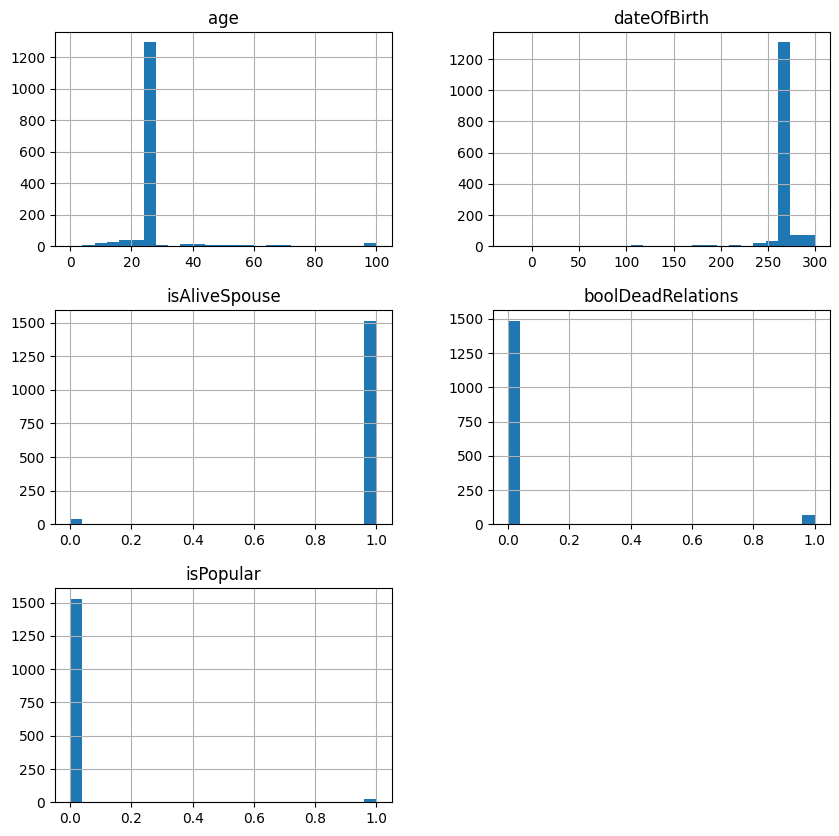

In [24]:
# дальше посмотрим распределение числовых признаков, оно не соответсвует нормальному
num_features.hist(figsize=(10, 10), bins=25, xlabelsize=10, ylabelsize=10)

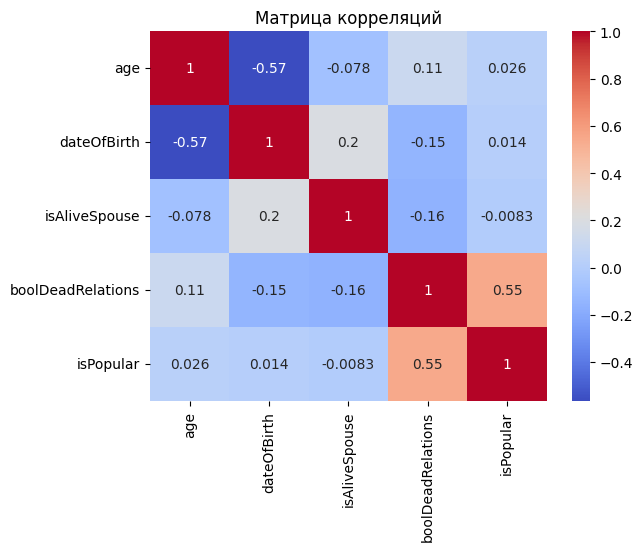

In [25]:
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

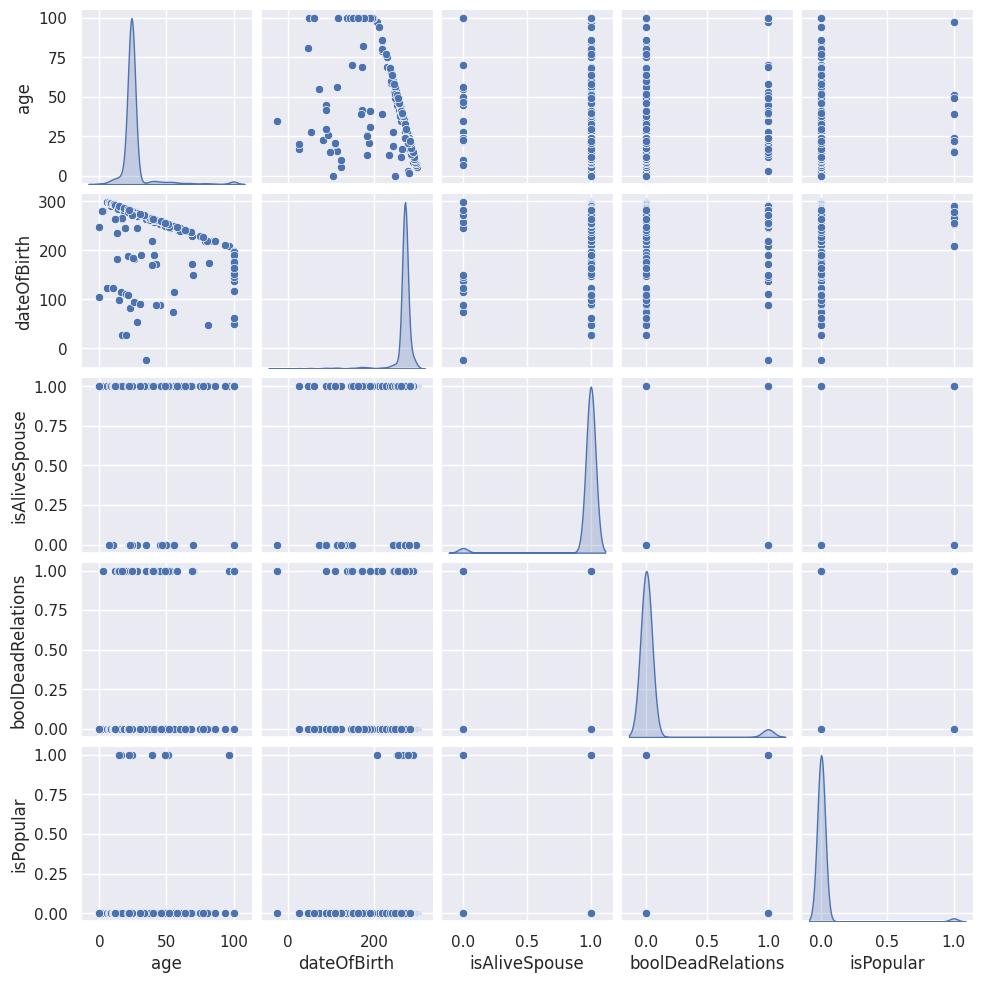

In [26]:
sns.set()
sns.pairplot(num_features, height=2, kind='scatter', diag_kind='kde')

# на матрице корреляций вроде бы не оч сильно коррелирует isPopular и boolDeadRelations,
# а на графиках ниже не наблюдаем сильной зависиомсти между числовыми признаками

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [27]:
data_ohe_processed.columns

Index(['male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveSpouse', 'isMarried', 'isNoble',
       ...
       'spouse_Viserys I Targaryen', 'spouse_Walder Frey',
       'spouse_Walter Whent', 'spouse_Walton Frey', 'spouse_Whalen Frey',
       'spouse_Wylis Manderly', 'spouse_Wynafrei Whent', 'spouse_Yandry',
       'spouse_Ynys Yronwood', 'spouse_Zhoe Blanetree'],
      dtype='object', length=741)

In [40]:
df_inter = data_ohe_processed[['isPopular', 'isNoble', 'male', 'isMarried', 'isAlive', 'book1']]

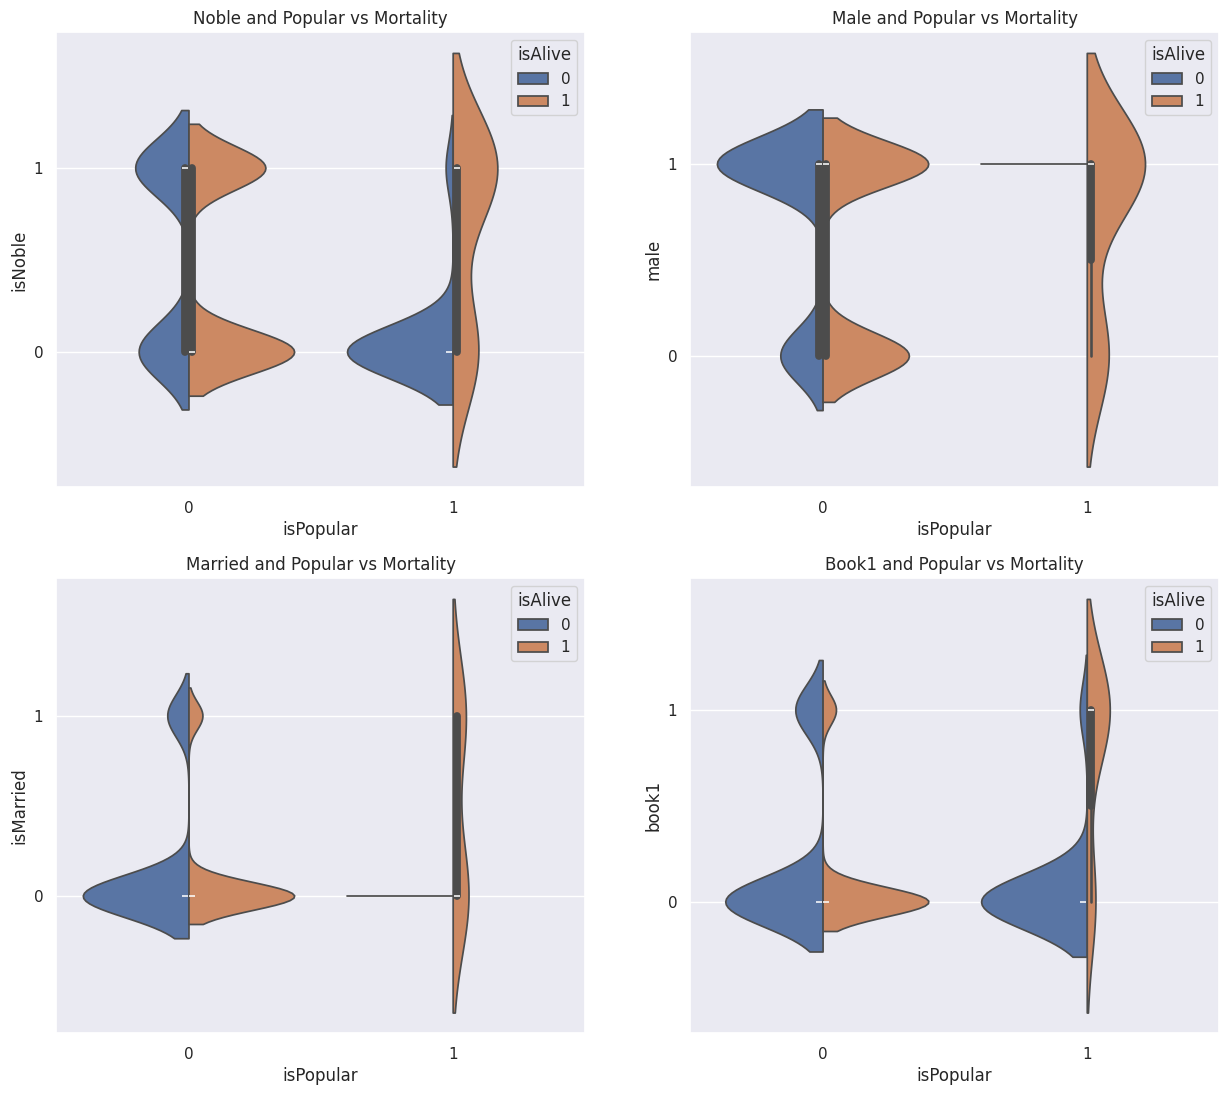

In [44]:
# попробуем сделать предположение, что male, isNoble, isPopular, isMarried, book1 имеют значительное влияние на таргет
# построим violin plot для того, чтобы показать наличие/отсутсвие зависимости таргета от разных фич

f, ax = plt.subplots(2, 2, figsize=(15,13))
sns.violinplot(x='isPopular', y='isNoble', hue='isAlive', data=df_inter, split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot(x='isPopular', y='male', hue='isAlive', data=df_inter, split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot(x='isPopular', y='isMarried', hue='isAlive', data=df_inter, split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))

sns.violinplot(x='isPopular', y='book1', hue='isAlive', data=df_inter, split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))

plt.show()

# ниже видно, что зависимость есть. Например, если персонаж Noble и Popular то скорее всего жив или мертв, если Popular и не появлялся в book1

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [45]:
y = data_ohe_processed['isAlive']

In [ ]:
y

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


In [46]:
X = data_ohe_processed.drop(['isAlive'], axis=1)

In [ ]:
X

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,1.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.0,1,1,1,1,1,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,1,0,1.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,0.0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,1.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,272.0,1,1,0,0,0,1.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,272.0,0,1,1,1,1,1.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2498, random_state=44)

In [ ]:
X_test

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
1196,1,249.0,1,1,1,1,1,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
433,1,272.0,0,0,0,0,0,1.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,1,272.0,0,0,0,0,1,1.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530,1,272.0,1,1,1,0,1,1.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1218,1,272.0,0,1,1,1,0,1.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1,272.0,1,1,1,1,1,1.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0,291.0,0,0,1,1,1,1.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,0,272.0,0,0,0,1,0,1.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# ТУТ ТЕСТ ВЫБОРКА, НЕ ВАЛИДАЦИОННАЯ
# делаем всё тоже самое, что и для train выборки

ttest_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col= 'S.No')

In [ ]:
ttest_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [54]:
ttest_data.select_dtypes(include=object)

,name,title,culture,mother,father,heir,house,spouse
S.No,,,,,,,,
1558,Melissa Blackwood,NaN,NaN,NaN,NaN,NaN,House Blackwood,NaN
1559,Melisandre,NaN,Asshai,NaN,NaN,NaN,R'hllor,NaN
1560,Merrit,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN
1561,Meryn Trant,Ser,NaN,NaN,NaN,NaN,House Trant,NaN
1562,Merrett Frey,NaN,Riverlands,NaN,NaN,NaN,House Frey,Mariya Darry
...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,Westeros,NaN,NaN,NaN,House Stark,NaN
1943,Reek,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN
1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
ttest_data.drop(columns=['mother', 'father', 'heir', 'isAliveHeir', 'isAliveMother', 'isAliveFather', 'name'], inplace=True)

In [56]:
ttest_data.shape

(389, 17)

In [57]:
ttest_data['isPopular'] = ttest_data['popularity'].apply(lambda x: 0 if x < 0.5 else 1)
ttest_data['boolDeadRelations'] = ttest_data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
ttest_data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

In [58]:
# функция, созданная выше в ноутбуке, которая меняет у категориальных - на моду, вещественные - на медиану

fill_na_values(ttest_data)

In [ ]:
ttest_data.isna().sum()

,0
title,0
male,0
culture,0
dateOfBirth,0
house,0
spouse,0
book1,0
book2,0
book3,0
book4,0


In [59]:
# ещё одна функция, которая объединяла похожие значения в признаке culture

ttest_data['culture'] = ttest_data['culture'].apply(replace_culture)

In [ ]:
ttest_data

,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1558,Ser,0,Northmen,156.0,House Blackwood,Tyrion Lannister,0,0,0,0,1,1.0,0,0,100.0,0,0
1559,Ser,0,Asshai,267.0,R'hllor,Tyrion Lannister,0,1,1,1,1,1.0,0,0,32.0,1,0
1560,Ser,0,Northmen,267.0,Brotherhood without banners,Tyrion Lannister,0,0,1,1,0,1.0,0,0,32.0,0,0
1561,Ser,1,Northmen,267.0,House Trant,Tyrion Lannister,1,1,1,1,1,1.0,0,1,32.0,0,0
1562,Ser,1,Riverlands,262.0,House Frey,Mariya Darry,1,1,1,1,1,1.0,1,0,38.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Ser,1,Westerosi,267.0,House Stark,Tyrion Lannister,1,1,1,1,1,1.0,0,0,32.0,0,0
1943,Ser,1,Northmen,267.0,House Bolton,Tyrion Lannister,0,1,0,1,1,1.0,0,0,32.0,0,0
1944,Ser,1,Northmen,267.0,House Targaryen,Tyrion Lannister,1,1,1,1,1,1.0,0,0,32.0,0,0


In [60]:
ttest_data['culture'].value_counts()

,count
culture,
Northmen,230
Ironborn,21
Dornish,20
Valyrian,15
Free Folk,12
Vale,12
Westerosi,9
Rivermen,9
Ghiscari,8


In [61]:
unprocessed_cat_features1 = ttest_data.select_dtypes(include=object)

ohe_cat_features1 = ohe.transform(unprocessed_cat_features1)
ohe_data1 = pd.DataFrame(ohe_cat_features1, columns=ohe.get_feature_names_out(unprocessed_cat_features1.columns),
                         index=unprocessed_cat_features1.index
                         )


In [62]:
data_ohe_processed1 = pd.concat([ttest_data, ohe_data1], axis=1)
data_ohe_processed1 = data_ohe_processed1.drop(unprocessed_cat_features1, axis=1)

In [ ]:
data_ohe_processed1

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,...,spouse_Viserys I Targaryen,spouse_Walder Frey,spouse_Walter Whent,spouse_Walton Frey,spouse_Whalen Frey,spouse_Wylis Manderly,spouse_Wynafrei Whent,spouse_Yandry,spouse_Ynys Yronwood,spouse_Zhoe Blanetree
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0,267.0,0,1,1,1,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,267.0,0,0,1,1,0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,1,267.0,1,1,1,1,1,1.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,1,262.0,1,1,1,1,1,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,267.0,1,1,1,1,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,1,267.0,0,1,0,1,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,1,267.0,1,1,1,1,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [63]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [64]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [66]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_val = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [67]:
# Шаг 1. создание модели
tree_clf = DecisionTreeClassifier(random_state=42)

# # Шаг 2. обучение модели
# tree_clf.fit(X_train, y_train)

# # Шаг 3. Предсказание на тестовых данных
# y_pred_tree = tree_clf.predict(X_test)

In [68]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [70]:
# используем GridSerachCV для нахождения оптимальных гиперпарамтеров DecisionTreeClassifier
param_grid = {
    'max_depth': np.arange(1, 7),
    'min_samples_leaf': np.arange(1, 4),
    'criterion': ['gini', 'entropy']
}

gridsearch = GridSearchCV(tree_clf, param_grid, refit=True, scoring='accuracy', cv=5, n_jobs=-1)

gridsearch.fit(X_train, y_train)
best_model = gridsearch.best_estimator_
y_pred_val_tree = best_model.predict(X_test) # ЭТО ВАЛИДАЦИОННАЯ ВЫБОРКА
y_pred_test_tree = best_model.predict(data_ohe_processed1) # А ЭТ ТЕСТОВАЯ ПРЕДОБРАБОТАННАЯ

print(gridsearch.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3}


In [71]:
ab_clf = AdaBoostClassifier()

params_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'random_state': [42]
}

gridsearch_ab = GridSearchCV(ab_clf, params_grid, cv=5, scoring='accuracy', n_jobs=-1)

gridsearch_ab.fit(X_train, y_train)

best_model_ab = gridsearch_ab.best_estimator_

y_pred_val_ab = best_model.predict(X_test)
y_pred_test_ab = best_model.predict(data_ohe_processed1)

In [72]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

y_pred_val_rf = rf_clf.predict(X_test)
y_pred_test_rf = rf_clf.predict(data_ohe_processed1)

In [73]:
gpс_clf = GaussianProcessClassifier(random_state=42)

gpс_clf.fit(X_train, y_train)

y_pred_val_gpc = gpс_clf.predict(X_test)
y_pred_test_gpc = gpс_clf.predict(data_ohe_processed1)

In [74]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred_val_gnb = gnb.predict(X_test)
y_pred_test_gnb = gnb.predict(data_ohe_processed1)

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred_val_knn = knn.predict(X_test)
y_pred_test_knn = knn.predict(data_ohe_processed1)

In [76]:
svc = SVC()

svc.fit(X_train, y_train)
y_pred_val_svc = svc.predict(X_test)
y_pred_test_svc = svc.predict(data_ohe_processed1)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [77]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [78]:
# Шаг 3. Предсказание на тестовых данных
y_pred_val = logistic_regression.predict(X_test)
y_pred_test_lr = logistic_regression.predict(data_ohe_processed1)

# Шаг 4. Оценка предсказания по метрике accuracy
print("Accuracy on validation: %.4f" % accuracy_score(y_test, y_pred_val))
print("Accuracy on test: %.4f" % accuracy_score(y_test, y_pred_test_lr))

Accuracy on validation: 0.8201
Accuracy on test: 0.7455


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [79]:
# Шаг 3. Предсказание на тестовых данных для дерева и оценка предсказания по метрике accuracy

print("Accuracy on validation: %.4f" % accuracy_score(y_test, y_pred_val_tree))
print("Accuracy on test: %.4f" % accuracy_score(y_test, y_pred_test_tree))

Accuracy on validation: 0.8252
Accuracy on test: 0.7326


In [80]:
# Accuracy для AdaBoost

print("Accuracy on validation: %4.f" % accuracy_score(y_test, y_pred_val_ab))
print("Accuracy on test: %4.f" % accuracy_score(y_test, y_pred_test_ab))

Accuracy on validation:    1
Accuracy on test:    1


In [81]:
# Accuracy для RF
print("Accuracy on validation: %4.f" % accuracy_score(y_test, y_pred_val_rf))
print("Accuracy on test: %4.f" % accuracy_score(y_test, y_pred_test_rf))

Accuracy on validation:    1
Accuracy on test:    1


In [83]:
# Accuracy для GNB
print(f"Accuracy on validation: {round(accuracy_score(y_test, y_pred_val_gnb), 4)}")
print(f"Accuracy on test: {round(accuracy_score(y_test, y_pred_test_gnb), 4)}")

Accuracy on validation: 0.3753
Accuracy on test: 0.4344


In [84]:
# Accuracy для KNN
print(f"Accuracy on validation: {round(accuracy_score(y_test, y_pred_val_knn), 4)}")
print(f"Accuracy on test: {round(accuracy_score(y_test, y_pred_test_knn), 4)}")

Accuracy on validation: 0.8278
Accuracy on test: 0.7301


In [85]:
# Accuracy для SVC
print(f"Accuracy on validation: {round(accuracy_score(y_test, y_pred_val_svc), 4)}")
print(f"Accuracy on test: {round(accuracy_score(y_test, y_pred_test_svc), 4)}")

Accuracy on validation: 0.8175
Accuracy on test: 0.7481


Выберите лучшую модель.

In [82]:
# Accuracy для GPC, best on test! submission accuracy ~ 0.7789
print(f"Accuracy on validation: {round(accuracy_score(y_test, y_pred_val_gpc), 4)}")
print(f"Accuracy on test: {round(accuracy_score(y_test, y_pred_test_gpc), 4)}")

Accuracy on validation: 0.8663
Accuracy on test: 0.7147


In [ ]:
# Надеюсь, дз было нетрудно проверять и оно само по себе не полное Г. Буду рад любым конструктивным комментам! Спасибо!

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 13.1MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
submission['isAlive'] = y_pred_test_gpc

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)